In [1]:
import sys
import os
import importlib
import numpy as np
import pandas as pd
from datasets import load_from_disk
import spacy
import string
import os
import re
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk
from keras.utils import pad_sequences
# import Tokenizer 
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from bs4 import BeautifulSoup
from gensim.models import Word2Vec,KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

/home/phu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-02 16:06:46.157436: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 16:06:46.202020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733130406.257474   71667 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733130406.273229   71667 cuda_blas.cc:1418] Unable to reg

In [28]:
df = pd.read_excel("/home/phu/TextSummary/NLP/dataset/clean.xlsx")

In [39]:
df.head()

,Text,Summary,cleaned_text,cleaned_summary
0,"Tổng thư ký Tổ chức Hiệp ước Bắc Đại Tây Dương (NATO) Jens Stoltenberg ngày 19/5 cho biết, nếu Ai Cập đề nghị, liên minh này sẽ hỗ trợ công tác tìm kiếm chiếc máy bay mang số hiệu MS 804 của hãng ...",Chiếc Airbus A320 (chuyến bay số hiệu MS804) bay từ thủ đô Paris đến thủ đô Cairo thì biến mất khỏi màn hình radar vào sáng sớm ngày 19.5.Các chuyên gia hàng không lo ngại một hành động cố ý đã kh...,"tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg 19/5 biết, cập đề nghị, liên minh hỗ trợ công tác kiếm máy bay hiệu ms 804 hãng hàng cập chở 66 tích ngày.“tôi gửi chia buồn sâu sắc...",airbus a320 bay thủ đô paris thủ đô cairo biến màn hình radar 19.5.các chuyên gia hàng lo ngại hành động cố máy bay biến màn hình radar.bộ trưởng hàng cập sherif fathy nghiêng khả năng ms804 khủng...
1,"Trả lời phỏng vấn, bà Hillary tuyên bố: “Tôi sẽ là ứng viên Tổng thống đại diện cho đảng tôi. Điều đó đã ngã ngũ rồi, không có gì thay đổi được”.Khẳng định của bà Hillary được đưa ra khi bà nắm ưu...","Cựu ngoại trưởng Mỹ Clinton nói rằng Donald Trump là mối đe dọa đến đất nước, nền dân chủ và nền kinh tế nước này.Bà cho rằng ứng viên tổng thống đảng Cộng hòa là người “vô trách nhiệm, bất cẩn và...","vấn, hillary tuyên bố: “tôi ứng viên tổng thống đại diện đảng tôi. ngã ngũ rồi, thay đổi được”.khẳng định hillary nắm ưu trội phiếu ủng hộ đối đối thủ bernie sanders, thượng nghị sỹ vermont. theo ...","cựu ngoại trưởng mỹ clinton donald trump đe dọa đất nước, dân chủ kinh tế này.bà ứng viên tổng thống đảng cộng hòa “vô trách nhiệm, bất cẩn phát ngôn nguy hiểm”.bà kết luận tiêu chuẩn trở thành tổ..."
2,"Lễ tuyên thệ của bà Thái diễn ra trước một lá cờ Đài Loan và chân dung người sáng lập hòn đảo Tôn Dật Tiên.Cơ quan Ngoại giao Đài Loan cho biết gần 700 nguyên thủ quốc gia, các nhà ngoại giao và q...","Bà Thái Anh Văn, Chủ tịch đảng Dân Tiến, đã giành chiến thắng trong cuộc bầu cử người đứng đầu chính quyền Đài Loan.Thách thức lớn nhất đối với bà sẽ là việc giải quyết mối quan hệ nguội lạnh với ...","lễ tuyên thệ thái diễn lá cờ đài loan chân dung lập hòn đảo tôn dật tiên.cơ quan ngoại giao đài loan 700 nguyên thủ quốc gia, ngoại giao quan chức tham dự kiện.trong vai trò mới, thái đương đầu th...","thái văn, chủ tịch đảng dân tiến, giành chiến thắng bầu cử đứng đầu chính quyền đài loan.thách thức đối giải quyết quan hệ nguội lạnh trung quốc vực dậy kinh tế đài loan suy thoái.bà thái bảo vệ n..."
3,"Những quan điểm nêu trên được các chuyên gia chia sẻ tại hội thảo “TP HCM - Khát vọng vươn lên” do báo Tuổi trẻ tổ chức ngày 19/5.Theo PGS. TS Trần Đình Thiên - Viện trưởng Viện kinh tế Việt Nam, ...","Ngày 19-5, tại hội thảo “TP.HCM - Khát vọng vươn lên”, nhiều chuyên gia đã chỉ ra những nguyên nhân cản trở sự vươn lên của TP.HCM, đồng thời đưa ra nhiều giải pháp để TP bứt phá, vươn lên, trở th...","quan nêu chuyên gia chia sẻ hội thảo “tp hcm khát vọng vươn lên” báo trẻ tổ chức 19/5.theo pgs. ts trần đình thiên viện trưởng viện kinh tế việt nam, tp hcm đầu tàu chạ","19-5, hội thảo “tp.hcm khát vọng vươn lên”, chuyên gia nguyên nhân cản trở vươn tp.hcm, đồng thời giải pháp tp bứt phá, vươn lên, trở thành tp chất sống tốt, văn minh, hiện đại, nghĩa tình.theo ch..."
4,"Ông Phạm Việt Thắng - Chủ tịch Hội Nghề cá Việt Nam vừa có công văn gửi Văn phòng Chính phủ, Bộ TN&MT, Bộ NN&PTNT, Bộ KH&CN, Bộ Tài chính sáng nay (27-5).Nội dung công văn đề nghị các cơ quan chức...",Hội nghề cá Việt Nam đề nghị Chính phủ và bộ ngành đẩy nhanh tiến độ xác định nguyên nhân cá chết hàng loạt ở các tỉnh Bắc miền Trung.Thời gian công bố nguyên nhân cá chết càng kéo dài thì chất độ...,"phạm việt thắng chủ tịch hội nghề cá việt nam công văn gửi văn phòng chính phủ, tn&mt, nn&ptnt, kh&cn, tài chính .nội dung công văn đề nghị quan chức năng đẩy tiến độ xác định nguyên nhân cá chết ...",hội nghề cá việt nam đề nghị chính phủ ngành đẩy tiến độ xác định nguyên nhân cá chết hàng loạt tỉnh bắc miền trung.thời gian công bố nguyên nhân 

In [40]:
def get_stopwords(file_stop_words):
    with open (file_stop_words,encoding = 'utf-8') as  f :
        stop_words = f.read()
    stop_words = stop_words.split("\n")
    return stop_words

def text_cleaner(text,num):
    # lower
    newString = text.lower()
    # remove HTML
    newString = BeautifulSoup(newString, "lxml").text
    # Remove any text inside the parenthesis
    newString = re.sub(r'\([^)]*\)', '', newString)
    # remove double quotes
    newString = re.sub('"','', newString)
    # remove 's
    newString = re.sub(r"'s\b","",newString)
    # Remove stopwords
    if(num==0):
        tokens = [w for w in newString.split() if not w in get_stopwords("/home/phu/TextSummary/stopwords.txt")]
    else:
        tokens=newString.split()
    long_words=[]
    # Remove short words
    for i in tokens:
        if len(i)>1:                                                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [41]:
clean_text = []
for t in df['Text']:
    clean_text.append(text_cleaner(t,0))
    


In [42]:
clean_text[:3]

['tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg 19/5 biết, cập đề nghị, liên minh hỗ trợ công tác kiếm máy bay hiệu ms 804 hãng hàng cập chở 66 tích ngày.“tôi gửi chia buồn sâu sắc ảnh hưởng vụ này. gửi chia buồn sâu sắc pháp cập. nỗ lực kiếm cứu nạn độ quốc gia. pháp cập phối hợp công tác tra. tiếp tục theo dõi chặt chẽ diễn biến đề nghị, nato sẵn sàng giúp đỡ”, jens stoltenberg nói.thủ tướng italy matteo renzi 19/5 gửi chia buồn, đồng thời bày tỏ đoàn kết cập vụ máy bay hãng hàng cập tích địa trung hải đường bay paris cairo.trước đó, hãng hàng quốc gia cập xác hy lạp mảnh vỡ máy bay nam đảo karpathos, nam địa trung hải. hãng gửi chia buồn gia đình hành chuyến bay tích xác đầu tiên thân nhân đời. hãng cam kết triển khai biện pháp giải quyết tình hình hiện tiến hành tra tổng thể.người đứng đầu quan tra tai nạn hàng cập ayman al-moqadem 19/5 biết, đầu ủy ban tra vụ tích máy bay hiệu ms 804.ủy ban bao nhân pháp, sản xuất airbus 320 nạn nhân hai cập. quan chức năng pháp 

In [43]:
cleaned_summary = []
for t in df['Summary']:
    if isinstance(t, str):  # Kiểm tra nếu t là chuỗi
        cleaned_summary.append(text_cleaner(t,0))
    else:
        cleaned_summary.append(text_cleaner(str(t),0))  # Chuyển đổi sang chuỗi


In [44]:
cleaned_summary[:3]

['airbus a320 bay thủ đô paris thủ đô cairo biến màn hình radar 19.5.các chuyên gia hàng lo ngại hành động cố máy bay biến màn hình radar.bộ trưởng hàng cập sherif fathy nghiêng khả năng ms804 khủng bố trục trặc kỹ thuật.họ nghi ngờ bom máy bay nổ tung, rơi biển.tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg hỗ trợ công tác kiếm máy bay ms 804.một tra quy mô tiến hành a320 biến mất.theo tin, hải mảnh nhựa vỡ màu trắng đỏ.những mảnh vỡ phát hiện khu vực hệ thống định vị khẩn máy bay phát tín hiệu đó.66 chết chuyến bay ms804 biến mất.ezeddin samar nữ tiếp viên mặt chuyến bay ms804.ngay cố, phát hiện đăng ảnh cạnh máy bay chìm.',
 'cựu ngoại trưởng mỹ clinton donald trump đe dọa đất nước, dân chủ kinh tế này.bà ứng viên tổng thống đảng cộng hòa “vô trách nhiệm, bất cẩn phát ngôn nguy hiểm”.bà kết luận tiêu chuẩn trở thành tổng thống mỹ.bà hillary clinton khẳng định trở thành ứng viên đại diện đảng dân chủ.khẳng định hillary nắm ưu trội phiếu ủng hộ đối đối thủ.tuy nhiên c

In [45]:
df['cleaned_text']=clean_text
df['cleaned_summary']=cleaned_summary

In [46]:
df.to_excel("/home/phu/TextSummary/NLP/cleaned_data.xlsx", index=False)

In [47]:
df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

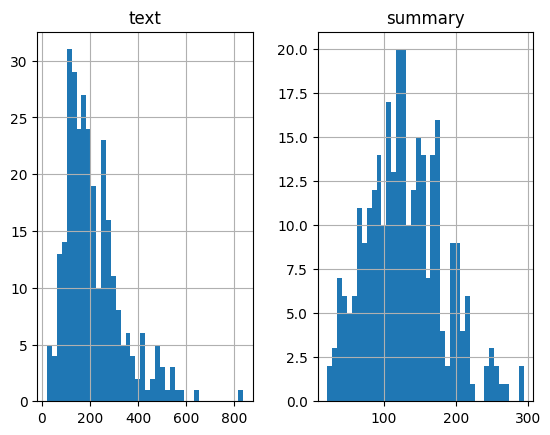

In [48]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 40)
plt.show()

In [49]:
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split()) <= 200):
        cnt=cnt+1
print(cnt/len(df['cleaned_summary']))

0.8966666666666666


In [50]:
cnt=0
for i in df['cleaned_text']:
    if(len(i.split()) <= 200):
        cnt=cnt+1
print(cnt/len(df['cleaned_text']))

0.5433333333333333


In [79]:
max_text_len=300
max_summary_len= 300

cleaned_text =np.array(df['cleaned_text'])
cleaned_summary=np.array(df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df_clean=pd.DataFrame({'text':short_text,'summary':short_summary})

In [80]:
df_clean.head()

,text,summary
0,"vấn, hillary tuyên bố: “tôi ứng viên tổng thống đại diện đảng tôi. ngã ngũ rồi, thay đổi được”.khẳng định hillary nắm ưu trội phiếu ủng hộ đối đối thủ bernie sanders, thượng nghị sỹ vermont. theo ...","cựu ngoại trưởng mỹ clinton donald trump đe dọa đất nước, dân chủ kinh tế này.bà ứng viên tổng thống đảng cộng hòa “vô trách nhiệm, bất cẩn phát ngôn nguy hiểm”.bà kết luận tiêu chuẩn trở thành tổ..."
1,"lễ tuyên thệ thái diễn lá cờ đài loan chân dung lập hòn đảo tôn dật tiên.cơ quan ngoại giao đài loan 700 nguyên thủ quốc gia, ngoại giao quan chức tham dự kiện.trong vai trò mới, thái đương đầu th...","thái văn, chủ tịch đảng dân tiến, giành chiến thắng bầu cử đứng đầu chính quyền đài loan.thách thức đối giải quyết quan hệ nguội lạnh trung quốc vực dậy kinh tế đài loan suy thoái.bà thái bảo vệ n..."
2,"quan nêu chuyên gia chia sẻ hội thảo “tp hcm khát vọng vươn lên” báo trẻ tổ chức 19/5.theo pgs. ts trần đình thiên viện trưởng viện kinh tế việt nam, tp hcm đầu tàu chạ","19-5, hội thảo “tp.hcm khát vọng vươn lên”, chuyên gia nguyên nhân cản trở vươn tp.hcm, đồng thời giải pháp tp bứt phá, vươn lên, trở thành tp chất sống tốt, văn minh, hiện đại, nghĩa tình.theo ch..."
3,"lan chết tư trói, cửa tập thể xác chồng gục vũng máu. hiện trường dấu hiệu vụ nổ.căn dấu vết hiện trường, hiện giả thuyết chồng sát hại vợ vật liệu nổ vẫn. nhiên, quan công an công bố thông kết lu...","19.5, dân thị trấn sơn phát hiện cặp vợ chồng tử vong bất địa phương.danh nạn nhân xác định đỗ viết t. vũ thị l. quê huyện thiệu hóa, hóa.bước đầu quan công nghi vấn, mâu thuẫn gia đình giết vợ sá..."
4,"16h 19/5, phạm đức huy hàn thùng xe tô tải bks: 47c-114.26, may điện giật tử vong.theo thông ban đầu, tiếng, huy trần hữu trung 93 giải phóng, p. tân thành, tp. buôn ma thuột bốc lốp xe cũ tô tải....","quan csđt tp. buôn ma thuột tiến hành tra nguyên nhân chết phạm đức huy .ngày 19/5, huy khiển xe tải gara phường tân thành sửa chữa.phát hiện thùng hư huy kéo điện hàn lại.lúc hai vợ chồng chủ sở ..."


In [81]:
df_clean['summary'] = df_clean['summary'].apply(lambda x : '__START__ '+ x + ' __END__')
df_clean.head()

,text,summary
0,"vấn, hillary tuyên bố: “tôi ứng viên tổng thống đại diện đảng tôi. ngã ngũ rồi, thay đổi được”.khẳng định hillary nắm ưu trội phiếu ủng hộ đối đối thủ bernie sanders, thượng nghị sỹ vermont. theo ...","__START__ cựu ngoại trưởng mỹ clinton donald trump đe dọa đất nước, dân chủ kinh tế này.bà ứng viên tổng thống đảng cộng hòa “vô trách nhiệm, bất cẩn phát ngôn nguy hiểm”.bà kết luận tiêu chuẩn tr..."
1,"lễ tuyên thệ thái diễn lá cờ đài loan chân dung lập hòn đảo tôn dật tiên.cơ quan ngoại giao đài loan 700 nguyên thủ quốc gia, ngoại giao quan chức tham dự kiện.trong vai trò mới, thái đương đầu th...","__START__ thái văn, chủ tịch đảng dân tiến, giành chiến thắng bầu cử đứng đầu chính quyền đài loan.thách thức đối giải quyết quan hệ nguội lạnh trung quốc vực dậy kinh tế đài loan suy thoái.bà thá..."
2,"quan nêu chuyên gia chia sẻ hội thảo “tp hcm khát vọng vươn lên” báo trẻ tổ chức 19/5.theo pgs. ts trần đình thiên viện trưởng viện kinh tế việt nam, tp hcm đầu tàu chạ","__START__ 19-5, hội thảo “tp.hcm khát vọng vươn lên”, chuyên gia nguyên nhân cản trở vươn tp.hcm, đồng thời giải pháp tp bứt phá, vươn lên, trở thành tp chất sống tốt, văn minh, hiện đại, nghĩa tì..."
3,"lan chết tư trói, cửa tập thể xác chồng gục vũng máu. hiện trường dấu hiệu vụ nổ.căn dấu vết hiện trường, hiện giả thuyết chồng sát hại vợ vật liệu nổ vẫn. nhiên, quan công an công bố thông kết lu...","__START__ 19.5, dân thị trấn sơn phát hiện cặp vợ chồng tử vong bất địa phương.danh nạn nhân xác định đỗ viết t. vũ thị l. quê huyện thiệu hóa, hóa.bước đầu quan công nghi vấn, mâu thuẫn gia đình ..."
4,"16h 19/5, phạm đức huy hàn thùng xe tô tải bks: 47c-114.26, may điện giật tử vong.theo thông ban đầu, tiếng, huy trần hữu trung 93 giải phóng, p. tân thành, tp. buôn ma thuột bốc lốp xe cũ tô tải....","__START__ quan csđt tp. buôn ma thuột tiến hành tra nguyên nhân chết phạm đức huy .ngày 19/5, huy khiển xe tải gara phường tân thành sửa chữa.phát hiện thùng hư huy kéo điện hàn lại.lúc hai vợ chồ..."


In [82]:
for i in range(5):
    print("Review:",df_clean['text'][i])
    print("Summary:",df_clean['summary'][i])
    print("\n")

Review: vấn, hillary tuyên bố: “tôi ứng viên tổng thống đại diện đảng tôi. ngã ngũ rồi, thay đổi được”.khẳng định hillary nắm ưu trội phiếu ủng hộ đối đối thủ bernie sanders, thượng nghị sỹ vermont. theo abc news, hillary hiện 2.293 phiếu đại biểu, 1.528 phiếu sanders. trở thành ứng viên đại diện đảng dân chủ tranh chức tổng thống, clinton 2.383 phiếu thiết.dù vậy, sanders tuyên bố quyết tâm theo đuổi cuộc.khi ứng viên tổng thống đảng cộng hoà, tỷ phú donald trump, trump “phát ngôn nguy hiểm”.bà nhắc hàng loạt phát ngôn sốc trump khẩu chiến chính trị gia anh, sẵn sàng lãnh đạo triều tiên kim jong un, kêu gọi mỹ rút nato quốc gia sở hữu vũ khí hạt nhân.đặc biệt, thẳng thắn phản trump ủng hộ chủ trương cấm hồi giáo nhập cảnh mỹ, gửi đi thông điệp tôn trọng đối quốc gia đa dân theo đạo hồi.
Summary: __START__ cựu ngoại trưởng mỹ clinton donald trump đe dọa đất nước, dân chủ kinh tế này.bà ứng viên tổng thống đảng cộng hòa “vô trách nhiệm, bất cẩn phát ngôn nguy hiểm”.bà kết luận tiêu chuẩ

In [83]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val=train_test_split(np.array(df_clean['text']), np.array(df_clean['summary']),
                                       test_size=0.1, random_state=0, shuffle=True) 

# A tokenizer builds the vocabulary and converts a word sequence to an integer sequence.
# We will now build tokenizers for text and summary.

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))


In [84]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:", (cnt/tot_cnt)*100)
print("Total Coverage of rare words:", (freq/tot_freq)*100)

% of rare words in vocabulary: 62.464387464387464
Total Coverage of rare words: 9.963716836931628


In [85]:
print(cnt),print(tot_cnt)

2631
4212


(None, None)

In [86]:
from keras.utils import pad_sequences
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) # num_words: the maximum number of words to keep, based on word frequency.
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [87]:
x_voc

1582

In [88]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [89]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.31904634342352
Total Coverage of rare words: 17.134959235802512


In [90]:
print(cnt),print(tot_cnt)

2737
3733


(None, None)

In [91]:
print(freq),print(tot_freq)

4897
28579


(None, None)

In [92]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [93]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [94]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [95]:
from tensorflow.keras.layers import Attention


In [96]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention Layer (Additive or Scaled Dot-product)
attention = AdditiveAttention()
attn_out = attention([decoder_outputs, encoder_outputs])
# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 300, 100)  │    158,200 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 300,      │    481,200 │ embedding_2[0][0] │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 300,      │    721,200 │ lstm_4[0][0]      │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 100) │     99,700 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 300,      │    721,200 │ lstm_5[0][0]      │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, None,     │    481,200 │ embedding_3[0][0… │
│                     │ 300), (None,      │            │ lstm_6[0][1],     │
│                     │ 300), (None,      │            │ lstm_6[0][2]      │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 300, 300)  │          0 │ lstm_6[0][0],     │
│ (Attention)         │                   │            │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None, 600) │          0 │ lstm_7[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, None, 997) │    599,197 │ concat_layer[0][… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,261,897 (12.44 MB)

 Trainable params: 3,261,897 (12.44 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [98]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [99]:
print([x_tr, y_tr[:,:-1]])


[array([[   5,  229,   90, ...,    0,    0,    0],
       [ 148,  644,   16, ...,    0,    0,    0],
       [   2,   12,   91, ...,    0,    0,    0],
       ...,
       [1063,  644,   16, ...,    0,    0,    0],
       [ 759, 1436,  327, ...,    0,    0,    0],
       [ 502,   16, 1155, ...,    0,    0,    0]], dtype=int32), array([[  2,   7, 309, ...,   0,   0,   0],
       [  2, 788,   8, ...,   0,   0,   0],
       [  2,   5,  16, ...,   0,   0,   0],
       ...,
       [  2, 471, 831, ...,   0,   0,   0],
       [  2,  92, 142, ...,   0,   0,   0],
       [  2, 361,   8, ...,   0,   0,   0]], dtype=int32)]


In [100]:
print(x_tr[2].shape)


(300,)


In [101]:
print(y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:].shape)


(222, 299, 1)


In [102]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [103]:
history=model.fit([x_tr,y_tr], 
                  y_tr,
                  epochs=10,
                  callbacks=[es],
                  batch_size=128, 
                  validation_data=([x_val,y_val], y_val)
                 )

Epoch 1/50


: 

In [75]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'tensor1' is not defined

In [1]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

NameError: name 'y_tokenizer' is not defined

In [2]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf= attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

NameError: name 'Model' is not defined

In [3]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    print("end")
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first word of target sequence with the start word.
    target_seq[0,0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        print("start0")
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        print("start")
        # Sample a token
        print(output_tokens[0, -1, :].shape)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        print("start2")
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c
        print("end2")
    return decoded_sentence

In [4]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [5]:
for i in range(0, 10,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    test = x_tr[i].reshape(1,max_text_len)
    test = np.tile(test, (max_text_len,1))
    print(test.shape)
    print("Predicted summary:",decode_sequence(test))
    print("\n")

NameError: name 'x_tr' is not defined

In [1]:
import pandas as pd
import re
import numpy as np
from rouge_score import rouge_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,Embedding
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
from gensim.models import KeyedVectors
from pyvi import ViTokenizer
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter

def load_excel_data(file_path):
    df = pd.read_excel(file_path)
    return df

def sentences_split(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

def get_stopwords(file_stop_words):
    with open(file_stop_words, encoding='utf-8') as f:
        stop_words = f.read()
    stop_words = stop_words.split("\n")
    return stop_words

def process_text(text, stop_words):
    newString = text.lower()
    newString = re.sub(r'\(.*?\)', '', newString)
    newString = re.sub(r'\[.*?\]', '', newString)
    newString = re.sub(r'\{.*?\}', '', newString)
    newString = re.sub(r'"([^"]*)"', '', newString)
    newString = re.sub('"', '', newString)
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub(r'\.{2,}', '.', newString)    
    words = newString.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


def sentencesVector(sentences, stop_words):
    w2v = KeyedVectors.load_word2vec_format("/home/phu/TextSummary/viet_vec/vi.vec")
    vocab = w2v.index_to_key 
    X = []
    for sentence in sentences:
        sentence_tokenized = ViTokenizer.tokenize(sentence)
        words = sentence_tokenized.split(" ")
        sentence_vec = np.zeros((100))
        for word in words:
            if word in vocab and word not in stop_words:
                sentence_vec += w2v[word]
        X.append(sentence_vec)
    return X


def sentences_clusters(X):
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters) 
    kmeans = kmeans.fit(X)
    return kmeans

# def buildSummary(kmeans, X, sentences): 
#     n_clusters = 5
#     avg = [] 
#     for j in range(n_clusters):
#         idx = np.where(kmeans.labels_ == j)[0]
#         avg.append(np.mean(idx))
#     closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
#     ordering = sorted(range(n_clusters), key=lambda k: avg[k])
#     summary = ' '.join([sentences[closest[idx]] for idx in ordering])
#     return summary

def compute_similarity(original_text, summary_text):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([original_text, summary_text])
    similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return similarity_matrix[0][0]

from tensorflow.keras.models import load_model
import os

def train_and_save_model(file_path, stop_words_path, model_path, epochs=30, batch_size=32):
    # Đọc dữ liệu từ file
    df = pd.read_excel(file_path)
    texts = df['Text'].tolist()
    summaries = df['Summary'].tolist()

    # Tải stop words
    stop_words = get_stopwords(stop_words_path)

    # Tiền xử lý văn bản
    processed_texts = [process_text(text, stop_words) for text in texts]
    processed_summaries = [process_text(summary, stop_words) for summary in summaries]

    # Tách câu
    tokenized_texts = [sentences_split(text) for text in processed_texts]
    tokenized_summaries = [sentences_split(summary) for summary in processed_summaries]

    # Vector hóa câu
    X = [sentencesVector(sentences, stop_words) for sentences in tokenized_texts]
    Y = [sentencesVector(sentences, stop_words) for sentences in tokenized_summaries]

    # Chuyển đổi X và Y thành numpy array
    X = np.array([np.mean(vec, axis=0) for vec in X])  # Trung bình vector của mỗi câu
    Y = np.array([np.mean(vec, axis=0) for vec in Y])

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Xây dựng mô hình LSTM
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=False))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(Y_train.shape[1]))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Huấn luyện mô hình
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

    # Lưu mô hình sau khi huấn luyện
    model.save(model_path)
    print(f"Model saved at {model_path}")
    
train_and_save_model(
    file_path="/home/phu/TextSummary/NLP/dataset/clean.xlsx",
    stop_words_path="/home/phu/TextSummary/stopwords.txt",
    model_path="/home/phu/TextSummary/model_lstm.h5"
)


2024-12-10 19:23:46.472818: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 19:23:46.718532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733833426.823225   17994 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733833426.871105   17994 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 19:23:47.058726: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - loss: 102.8440 - mae: 6.4595 - val_loss: 69.0488 - val_mae: 5.2899
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 83.5997 - mae: 5.8069 - val_loss: 54.2002 - val_mae: 4.5921
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 68.0828 - mae: 5.2576 - val_loss: 43.1147 - val_mae: 4.7170
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 51.5126 - mae: 4.8659 - val_loss: 36.9399 - val_mae: 4.3866
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 53.5657 - mae: 5.0580 - val_loss: 34.4446 - val_mae: 3.9573
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 45.0861 - mae: 4.4247 - val_loss: 34.5794 - val_mae: 4.2903
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 54.5988 - mae: 5.1563 - val_loss: 33.6319 - val_mae: 3.9107
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 55.1819 - mae: 4.7022 - val_loss: 33.1966 - val_mae: 3.9931
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - lo

Model saved at /home/phu/TextSummary/model_lstm.h5


In [6]:
from tensorflow.keras.metrics import MeanSquaredError

def test_model(model_path, test_text, stop_words_path):
    # Tải mô hình đã lưu
    model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})
    
    # Tải stop words
    stop_words = get_stopwords(stop_words_path)
    
    # Tiền xử lý văn bản đầu vào
    processed_text = process_text(test_text, stop_words)
    
    # Tách câu
    tokenized_sentences = sentences_split(processed_text)
    
    # Vector hóa câu
    sentence_vectors = sentencesVector(tokenized_sentences, stop_words)
    
    # Chuyển đổi thành numpy array
    input_vector = np.array([np.mean(sentence_vectors, axis=0)])  # Trung bình vector của mỗi câu
    
    # Dự đoán tóm tắt
    predicted_summary_vector = model.predict(input_vector)
    
    # Chuyển vector dự đoán thành câu (nếu cần)
    # Để chuyển đổi ngược từ vector thành văn bản, bạn có thể cần sử dụng Word2Vec hoặc các phương pháp khác
    
    return predicted_summary_vector


In [7]:
test_text = """
    Đây là một đoạn văn bản mẫu để kiểm tra mô hình tóm tắt văn bản. 
    Đoạn văn này có nội dung khá đơn giản và có thể được dùng để kiểm tra tính chính xác của mô hình.
    """
predicted_summary = test_model(
    model_path="/home/phu/TextSummary/model_lstm.h5",
    test_text=test_text,
    stop_words_path="/home/phu/TextSummary/stopwords.txt"
)

print("Predicted Summary Vector:", predicted_summary)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Predicted Summary Vector: [[ -0.4464026    5.421645    -0.13365822   1.0273235    6.6817937
   -3.890438    -2.570472     2.4842787   -6.452278     8.997429
   -4.221452     3.974446     0.10003828  -6.9199224   -8.963864
    2.686911   -10.360041    -8.530114    15.521974    -4.0306726
    1.0624844    4.6274095   -4.0746007   -0.09103265 -10.196865
    5.574452     6.5963116   -3.145442    -0.44569653   1.0170652
   -4.847315     0.6115204    1.8943576   -4.041407     5.857886
   -4.5187874   -4.291761     4.4393883   -5.4163284   -0.5851571
    1.3084642   -1.4493437   -5.2996626   -2.695368    -3.6587539
  -21.692377     1.176673   -13.277483     0.34399685   5.980581
   -3.3474913   -4.7816486    5.222465    -6.5798945    5.3650866
  -10.002558     0.32048553   4.721474     7.316095   -13.107717
   -3.136981     7.9700556   -4.639115     0.09022091  -6.998413
    7.4179077   -8.66989      9.677068     2.5438194    6.5646176
    3.1846492   -8